In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import transformers

In [11]:
df=pd.read_csv('D:\KMITL\Year 3\Sentiment_Analysis\data.csv')
print(df.shape)
print(df.head)

(5842, 2)
<bound method NDFrame.head of                                                Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]>


Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


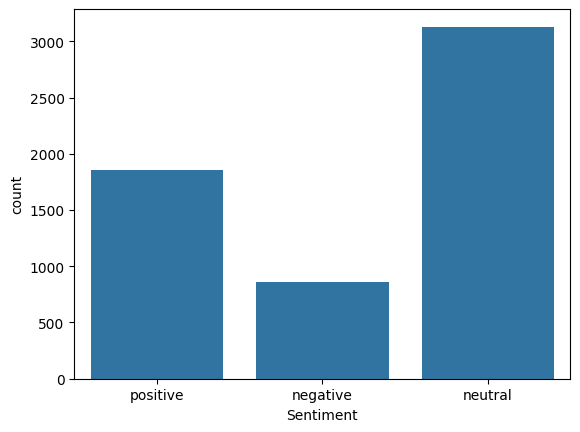

In [12]:
sentimentDist = df['Sentiment'].value_counts()

sns.countplot(x='Sentiment',data=df)
plt.show
print(sentimentDist)

In [24]:
#Try bag of word/VADER model approach
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tang-\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
df['ID'] = range(1, len(data) + 1)

{'neg': 0.619, 'neu': 0.231, 'pos': 0.15, 'compound': -0.6207}